In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


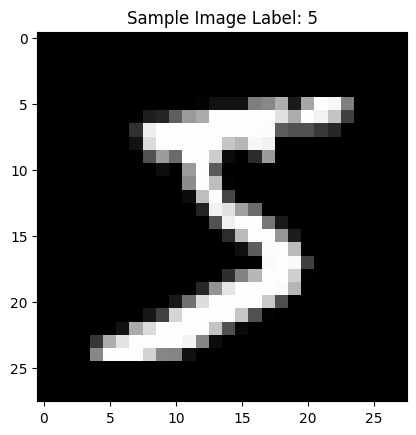

In [9]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Sample Image Label: {y_train[0]}")
plt.show()



In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical (y_test, 10)

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
history = model.fit(x_train, y_train_encoded, epochs=10, batch_size=128, validation_data=(x_test, y_test_encoded))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8270 - loss: 0.6065 - val_accuracy: 0.9527 - val_loss: 0.1665
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9604 - loss: 0.1391 - val_accuracy: 0.9660 - val_loss: 0.1168
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9717 - loss: 0.0938 - val_accuracy: 0.9697 - val_loss: 0.0955
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9788 - loss: 0.0707 - val_accuracy: 0.9741 - val_loss: 0.0866
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9841 - loss: 0.0544 - val_accuracy: 0.9683 - val_loss: 0.1021
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0438 - val_accuracy: 0.9752 - val_loss: 0.0808
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9749 - val_loss: 0.0828
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print("\nTest Accuracy:", round(test_accuracy * 100, 2), "%")

313/313 - 0s - 1ms/step - accuracy: 0.9780 - loss: 0.0806

Test Accuracy: 97.8 %


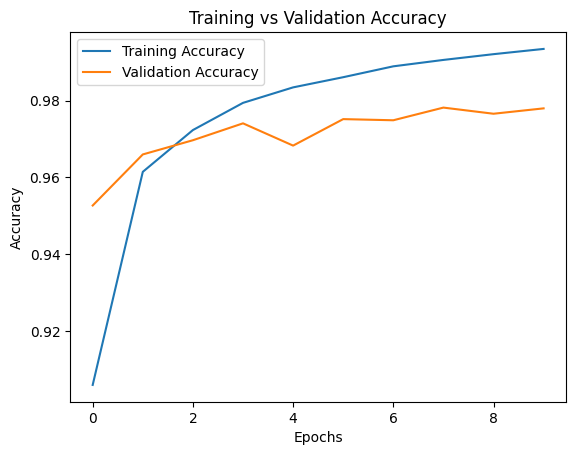

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
pred = np.argmax(model.predict(x_test[:5]), axis=1)
print("\nPredicted labels:", pred)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]
